In [375]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image

In [376]:
def show(image):
    plt.figure(figsize=(13,16))
    plt.imshow(image)
    plt.show()

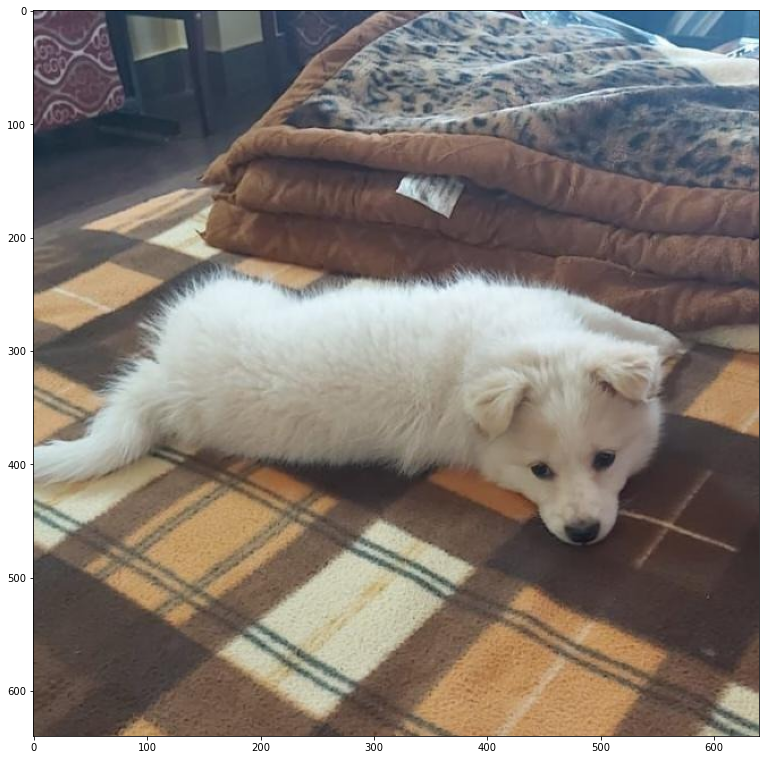

In [377]:
img = cv2.imread('Luxie.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert the image from bgr to rgb
org_img = np.copy(img)

show(img)

Adaptive thresholding is a form of image thresholding technique in which rather than specifying the threshold value manually or using any restrictions, the threshold value is adjusted and selected automatically according to the image pixels and layout for converting the image pixels to grayscale or a binary image.

In [378]:
# Create Edge Mask
def edge_mask(img, line_size, blur_value):
    """
    Input - Input Image
    Output - Edges Of Images"""
    gray = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges= cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, line_size, blur_value)
    return edges
    
    

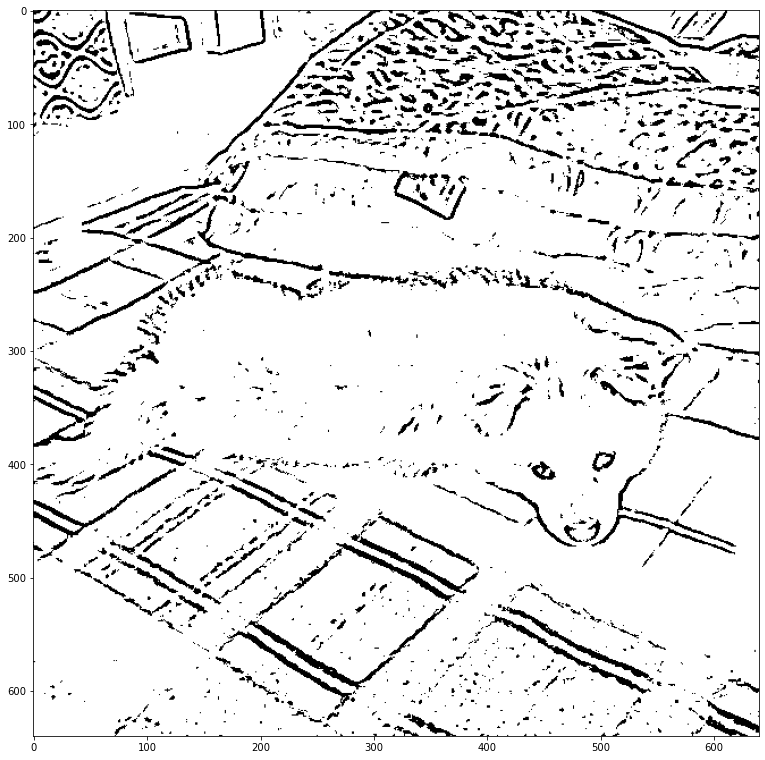

In [379]:
line_size, blur_value = 7,5
edges = edge_mask(img, line_size, blur_value)
plt.figure(figsize=(13,16))
plt.imshow(edges, cmap= 'gray')
plt.show()

# Reduce the Color Palette
Reducing the number of color the we are using here.

In [380]:
def color_quantization(img, k):
    
    # Transform the image
    data = np.float32(img).reshape((-1,3))
    
    # Determine the Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    ## Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result
    

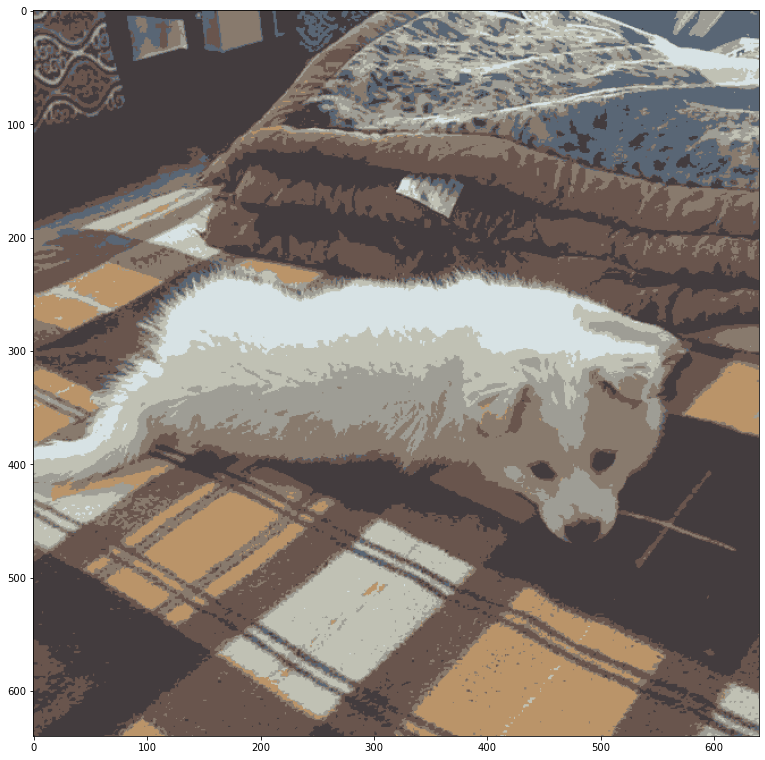

In [381]:
img = color_quantization(img, k=8)
show(img)

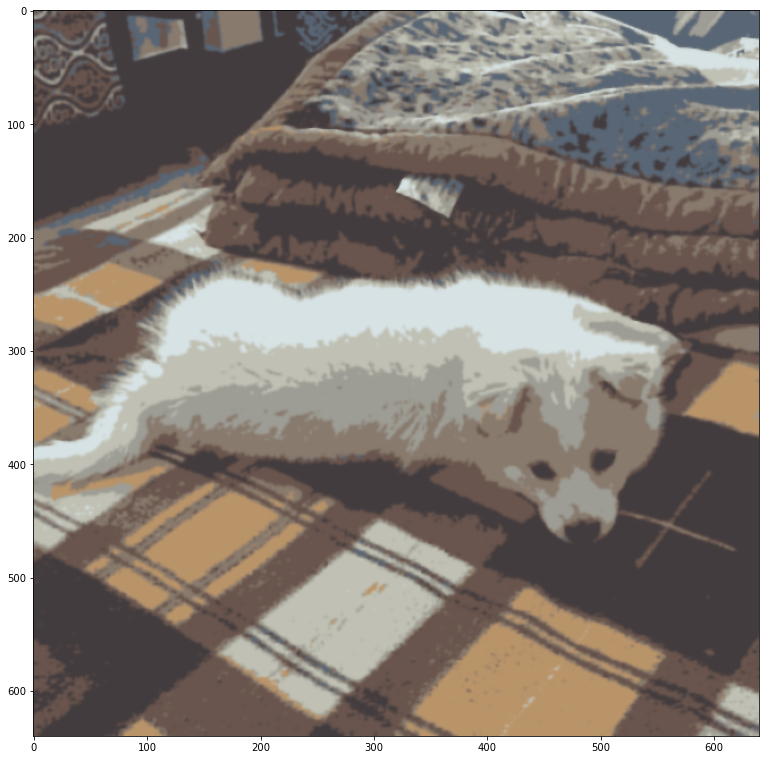

In [382]:
# Reduce The Noise
# Bilateral Filter is edge perserving denoising fliter

blurred = cv2.bilateralFilter(img, d =4, sigmaColor= 200, sigmaSpace = 200)

show(blurred)

# Combine Edge Mask With The Quantizing

In [383]:
def cartoon():
    
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    plt.figure(figsize=(13,16))
    plt.imshow(c)
    plt.title('Cartoonified Image')
    plt.show()
    
    plt.figure(figsize=(13,16))
    plt.imshow(org_img)
    plt.title('Original Image')
    plt.show()
    

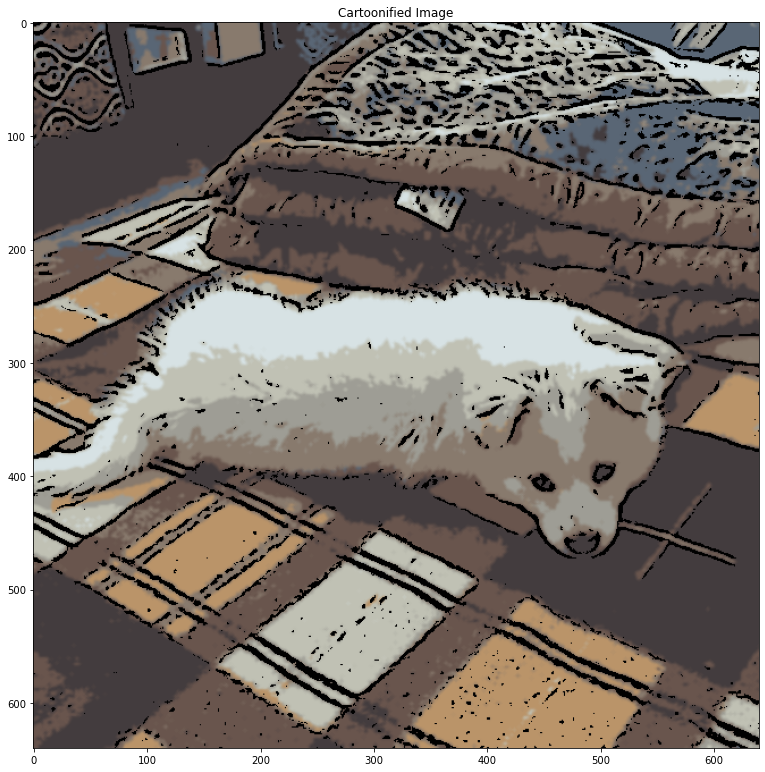

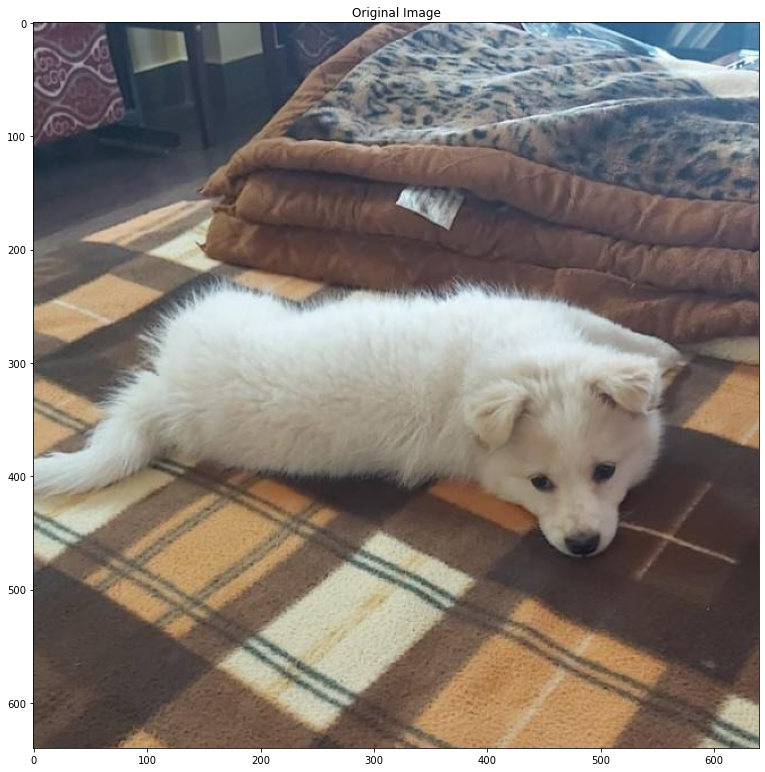

In [384]:
cartoon()